In [1]:
import torch

# Basic syntax

In [2]:
x = torch.empty(5,3)
print(x)

tensor([[4.4650e+30, 7.0975e+22, 7.9309e+34],
        [7.9439e+08, 3.2604e-12, 7.3113e+34],
        [2.0706e-19, 7.7180e+28, 6.0041e+31],
        [4.2964e+24, 4.8418e+30, 1.6926e+22],
        [5.7886e+22, 6.7120e+22, 1.1632e+33]])


In [3]:
x = torch.rand(5,3)
print(x)

tensor([[0.7427, 0.5869, 0.1254],
        [0.5020, 0.8982, 0.5763],
        [0.6277, 0.6482, 0.9922],
        [0.3472, 0.5352, 0.0224],
        [0.0161, 0.8659, 0.7811]])


In [4]:
x = torch.zeros(5,3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
x = torch.tensor([1,2,3])
print(x)

tensor([1, 2, 3])


In [8]:
x = x.new_ones(5,3,dtype=torch.double)
x = torch.randn_like(x, dtype=torch.float)
print(x)
print(x.size())

tensor([[ 0.2375, -1.7654,  0.3036],
        [-1.1965,  0.5711, -0.3107],
        [-0.0434,  0.2511, -0.4773],
        [ 1.8522, -0.4709,  0.2595],
        [-1.7335,  0.2397,  0.3884]])
torch.Size([5, 3])


In [9]:
y = torch.randn_like(x)
result = torch.add(x,y)
print(result)

tensor([[ 1.4067, -0.2276,  0.2703],
        [-1.4661, -0.0037,  0.0286],
        [-0.4923,  0.5556, -0.6067],
        [ 1.1883,  0.9702, -0.6947],
        [-0.8136, -1.7465,  0.9796]])


In [11]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8)
print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [12]:
a = torch.ones(5)
b = a.numpy()
a.add_(1)
print(a,b)

tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]


In [13]:
torch.cuda.is_available()

False

## Could not test gpu features this time

# AutoGrad

In [14]:
x = torch.ones(2,2,requires_grad=True)

In [15]:
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [16]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [17]:
print(y.grad_fn)

In [18]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [19]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [20]:
out.backward()

In [21]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [23]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-1158.1826,  -398.4930,  -667.4005], grad_fn=<MulBackward0>)


In [24]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [25]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [26]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


# Neural Networks 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        #Convolution kernels
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        #Afine operations
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        #Max pooling over 2x2 window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)    

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [5]:
params = list(net.parameters())
print(len(params))
print(params[0].size())


10
torch.Size([6, 1, 3, 3])


In [6]:
inp = torch.randn(1, 1, 32, 32)
out = net(inp)
print(out)

tensor([[ 0.0727, -0.1362, -0.1254, -0.0791, -0.1020, -0.0467, -0.1799,  0.0680,
          0.0075,  0.0573]], grad_fn=<AddmmBackward>)


In [7]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [9]:
out = net(inp)
target = torch.randn(10)
target = target.view(1,-1)
criterion = nn.MSELoss()

loss = criterion(out, target)
print(loss)

tensor(0.5534, grad_fn=<MseLossBackward>)


In [13]:
net.zero_grad()

print('conv1.bias.grad before backprop')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backprop')
print(net.conv1.bias.grad)

conv1.bias.grad before backprop
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backprop
tensor([ 0.0014, -0.0139,  0.0042, -0.0004,  0.0088, -0.0028])


In [14]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [15]:
import torch.optim as optim

# Define optimizer:
optimizer = optim.SGD(net.parameters(), lr=0.01)

# put in training loop:
optimizer.zero_grad()
out = net(inp)
loss = criterion(out, target)
loss.backward()
optimizer.step()

# Image Classifier 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


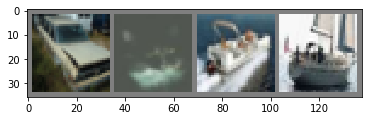

  car   cat  ship  ship


In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.184
[1,  4000] loss: 1.844
[1,  6000] loss: 1.658
[1,  8000] loss: 1.590
[1, 10000] loss: 1.524
[1, 12000] loss: 1.503
[2,  2000] loss: 1.407
[2,  4000] loss: 1.381
[2,  6000] loss: 1.370
[2,  8000] loss: 1.331
[2, 10000] loss: 1.313
[2, 12000] loss: 1.299
Finished Training


In [10]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

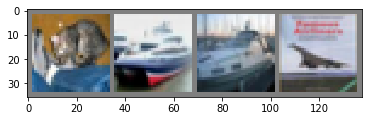

GroundTruth:    cat  ship  ship plane


In [11]:
%matplotlib inline

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [13]:
outputs = net(images)

In [14]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog   car truck  ship


In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [35]:
class_matrix = np.zeros((10,10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        #c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            predict = predicted[i]
            #class_correct[label] += c[i].item()
            class_matrix[label,predict] += 1
            class_total[label] += 1


for i in range(10):
    class_matrix[i] *= 1/class_total[i]

In [38]:
import pandas as pd

confusion_matrix = pd.DataFrame(class_matrix, columns = classes, index = classes)
print(confusion_matrix)

       plane    car   bird    cat   deer    dog   frog  horse   ship  truck
plane  0.608  0.044  0.065  0.022  0.022  0.047  0.012  0.011  0.073  0.096
car    0.028  0.648  0.014  0.013  0.004  0.006  0.010  0.012  0.021  0.244
bird   0.060  0.016  0.423  0.056  0.076  0.206  0.088  0.040  0.009  0.026
cat    0.017  0.012  0.080  0.258  0.063  0.385  0.099  0.028  0.009  0.049
deer   0.033  0.018  0.157  0.032  0.374  0.149  0.080  0.131  0.013  0.013
dog    0.005  0.009  0.070  0.087  0.031  0.691  0.034  0.045  0.005  0.023
frog   0.012  0.021  0.063  0.065  0.065  0.097  0.613  0.018  0.007  0.039
horse  0.016  0.008  0.052  0.038  0.044  0.208  0.008  0.593  0.001  0.032
ship   0.121  0.083  0.037  0.027  0.009  0.027  0.012  0.008  0.582  0.094
truck  0.027  0.119  0.024  0.028  0.001  0.010  0.011  0.029  0.021  0.730
